# Innlevering 2 - Covid-19

## Del 1

Du har frist til torsdag 19. mars for å lage en modell for utviklingen til antall bekreftede smittede av Covid-19 i følgende land:
 - Norge
 - Danmark
 - Frankrike


Du skal ta utgansgspunkt i difflikningen $$N^{\prime}(t) = c N(t)\left(1-\frac{N(t)}{b}\right)$$

fra videoen under

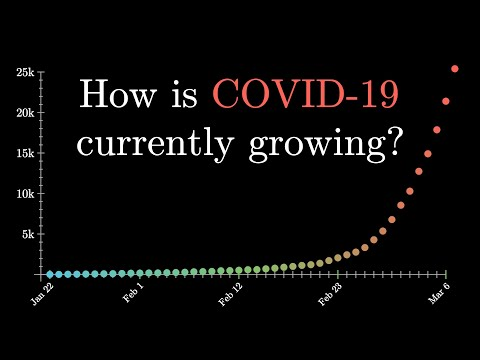

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('Kas0tIxDvrg', width=800, height=400)

der 

 - $N$ er antall bekreftet smittet. 
 - $c$ = $p \cdot E$ 
 - $E$ er antall smittede en person er i kontakt med i gjennomsnitt hver dag.
 - $p$ er sannsynligheten for at en smitter en man er i kontakt med.
 - $b$ er bæreevnen til viruset
 
 
 Fra og med 13. mars skjedde det noe med E i Norge, kan du på en fornuftig måte få med det i modellen?
 Det skjedde i Danmark 12. mars. Under er et eksempel på hvilket utslag det kan få for de to tilfellene. (Tallene under er ikke fra Norge og Danmark)
 
 <img src="https://miro.medium.com/max/5972/1*4kOJv8hmd5VFPcBL1mywsw.png">
 
Det er også en del forsinkelser fra en person er smitted til den blir testet for det. 5 dagers inkubasjonsttid pluss én uke med milde symptomer. I Wuhan tok det 12 dager etter de stengte alt til vekstraten ble under 1. Altså vendepunktet for grafen til N. Antall tilfeller i norge er betydelig lavere og det er ganske sannsynlig at det vil gå litt raskere her. 


Se 02_Populasjonsmodeller for tips til Eulers metode.


### Oppgave

 - Bestem $p$, $E$ og $b$ for Norge, Danmark og Frankrike. Begrunn valgene. 
 
 - Kjør modellene for $N=90$ (antall dager) med startdato 2. mars

 - Plot grafene til modellene sammen med dataen du har frem til torsdag. 

 - Plot også den deriverte til de ulike modellen
 
  ```python
  plt.plot(t[1:-1], (N[1:-1]-N[0:-2])/dt)
  ```
 
 
 - Husk navn på grafer og akser.
 
 - Forklar resultatene du får og sammenlign mellom de ulike landene.

## Pandas

In [1]:
import pandas as pd

**Laste inn dataene i csv-filen til en dataframe**

<a href="https://www.kaggle.com/imdevskp/corona-virus-report/download/2UVx3oPVlnwZT6B0waRH%2Fversions%2FoJwdH0eyPFvVTCfhLgrR%2Ffiles%2Fcovid_19_clean_complete.csv?datasetVersionNumber=45">Datasett</a> - oppdateres hver dag.

In [2]:
df = pd.read_csv('covid_19_clean_complete.csv')
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0
5,Guangdong,Mainland China,23.3417,113.4244,1/22/20,26,0,0
6,Guangxi,Mainland China,23.8298,108.7881,1/22/20,2,0,0
7,Guizhou,Mainland China,26.8154,106.8748,1/22/20,1,0,0
8,Hainan,Mainland China,19.1959,109.7453,1/22/20,4,0,0
9,Hebei,Mainland China,38.0428,114.5149,1/22/20,1,0,0


**Fikse formate på dato og årstall**

In [46]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Country/Region,Confirmed
0,2020-01-22,Afghanistan,0
1,2020-01-22,Albania,0
2,2020-01-22,Algeria,0
3,2020-01-22,Andorra,0
4,2020-01-22,Argentina,0


**Fjerne regionene++ og legge sammen smittede**

In [4]:
df = df.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index() 
df.head()

,Date,Country/Region,Confirmed
0,2020-01-22,Afghanistan,0
1,2020-01-22,Albania,0
2,2020-01-22,Algeria,0
3,2020-01-22,Andorra,0
4,2020-01-22,Argentina,0


**Kan også fikse tabellen slik at vi får en tidsserie for hvert land**

In [50]:
df_p = df.pivot(index='Date', columns='Country/Region', values='Confirmed')
df_p.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Taipei and environs,Thailand,Togo,Tunisia,UK,US,Ukraine,United Arab Emirates,Viet Nam,occupied Palestinian territory
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,1,2,0,0,0,1,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,1,3,0,0,0,1,0,0,2,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,3,5,0,0,0,2,0,0,2,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,3,7,0,0,0,2,0,0,2,0
2020-01-26,0,0,0,0,0,0,4,0,0,0,...,4,8,0,0,0,5,0,0,2,0


**Plukk ut landene du ønsker å se på**

In [52]:
df_p = df_p[['Norway','Denmark','France','US', 'UK', 'Sweden', 'Spain']]
df_p.head()

Country/Region,Norway,Denmark,France,US,UK,Sweden,Spain
Date,,,,,,,
2020-01-22,0,0,0,1,0,0,0
2020-01-23,0,0,0,1,0,0,0
2020-01-24,0,0,2,2,0,0,0
2020-01-25,0,0,3,2,0,0,0
2020-01-26,0,0,3,5,0,0,0


**Plot**

In [53]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 4.5)
plt.style.use('ggplot')

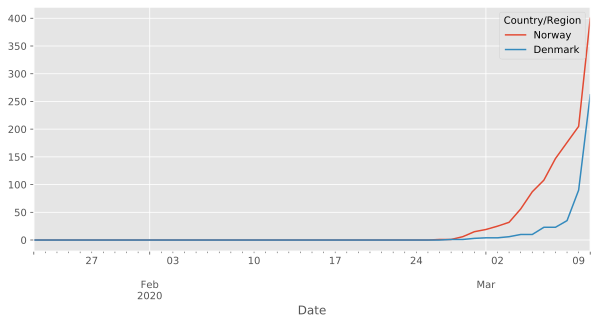

In [54]:
df_p.plot(y=['Norway', 'Denmark'])

**Plot for mars**

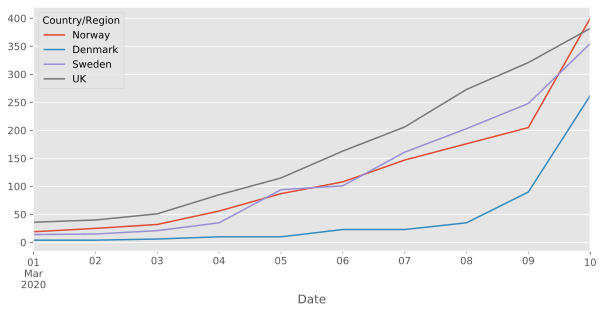

In [56]:
df_p['2020-03'].plot(y=['Norway','Denmark','Sweden','UK'])

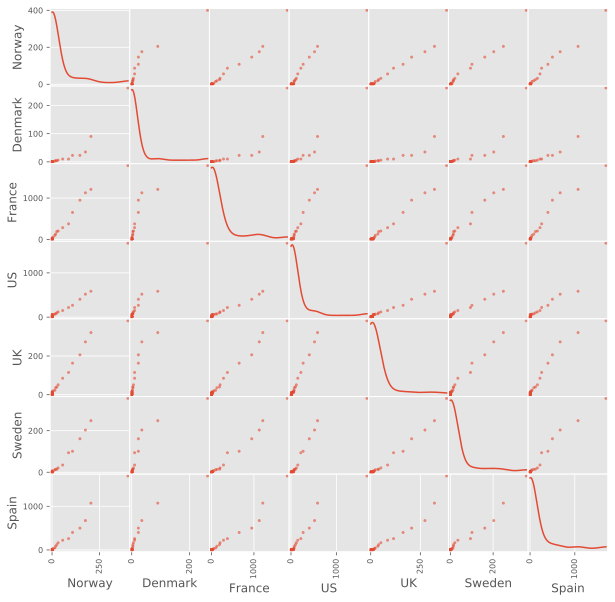

In [57]:
pd.plotting.scatter_matrix(df_p, alpha=0.6, figsize=(10, 10), diagonal='kde')
plt.show()

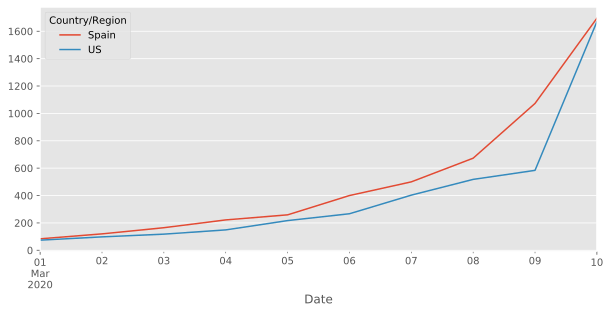

In [60]:
df_p['2020-03'].plot(y=['Spain','US'])